1 Preprocessing (20 pts)

Please leave your codes and results in the following sub-questions.


(a) First we will load the data using spark data source API. Write codes to load and print
out its schema using printSchema().

In [1]:
#from pyspark.mllib.stat import Statistics
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession


sqlContext = SQLContext(sc)
spark = SparkSession.builder.appName('Spark Session 1').getOrCreate()
df = spark.read.csv('test.csv', header=True)

In [2]:
df_test = spark.read.csv('test.csv', header=True)
df_train = spark.read.csv('train.csv', header=True)
df_test.printSchema()
df_train.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [42]:
df_train.show()

+-----------+--------+------+--------------------+------+---------+-----+-----+-------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|      Age|SibSp|Parch|   Fare|Embarked|
+-----------+--------+------+--------------------+------+---------+-----+-----+-------+--------+
|          1|     0.0|     3|Braund, Mr. Owen ...|  male|     22.0|    1|    0|   7.25|       S|
|          2|     1.0|     1|Cumings, Mrs. Joh...|female|     38.0|    1|    0|71.2833|       C|
|          3|     1.0|     3|Heikkinen, Miss. ...|female|     26.0|    0|    0|  7.925|       S|
|          4|     1.0|     1|Futrelle, Mrs. Ja...|female|     35.0|    1|    0|   53.1|       S|
|          5|     0.0|     3|Allen, Mr. Willia...|  male|     35.0|    0|    0|   8.05|       S|
|          6|     0.0|     3|    Moran, Mr. James|  male|29.699118|    0|    0| 8.4583|       Q|
|          7|     0.0|     1|McCarthy, Mr. Tim...|  male|     54.0|    0|    0|51.8625|       S|
|          8|     0.0|     3|P

(b) Find columns that include Missing values. After that, fill the mean value for all the
missing values. Please drop Ticket and Cabin columns.

In [3]:
from pyspark.sql.functions import *
columns = set(df_test.columns) - set(['Ticket', 'Cabin'])
print(columns)
df_test = df_test.drop('Ticket')
df_test = df_test.drop('Cabin')

df_train = df_train.drop('Ticket')
df_train = df_train.drop('Cabin')
#df_train.where(null).show()

{'Pclass', 'Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp', 'Name', 'PassengerId'}


In [4]:
def null_value_count(df):
    null_columns_counts = []
    numRows = df.count()
    for k in df.columns:
        nullRows = df.where(col(k).isNull()).count()
        if(nullRows > 0):
            temp = k,nullRows
            null_columns_counts.append(temp)
    return(null_columns_counts)

In [5]:
null_columns_count_list = null_value_count(df_train)
null_columns_count_list

[('Age', 177), ('Embarked', 2)]

In [6]:
#test
mean_Age_train = df_train.select(mean('Age')).collect()[0][0]
#mean_Embarked_train = df_train.select(mean('Embarked')).collect()[0][0]


In [7]:
import math

df_train = df_train.na.fill({"Age" : mean_Age_train})

In [8]:
df_train.groupBy('Embarked').count().collect()

[Row(Embarked='Q', count=77),
 Row(Embarked=None, count=2),
 Row(Embarked='C', count=168),
 Row(Embarked='S', count=644)]

S is most frequent value

In [9]:
df_train = df_train.na.fill({'Embarked': '0'})

In [ ]:
df_train = df_train.withColumn('prediction', df_train['prediction'].cast("integer").alias('prediction'))


In [10]:
df_hist = df_train.select('Age').rdd.flatMap(lambda x:x)

(c) Visualize a histogram for an Age column.


In [44]:
toFloat = ['Age', 'PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [55]:
df_train.printSchema()

for col in toFloat:
    df_train = df_train.withColumn(col, df_train[col].cast("float").alias(col))


df_train.printSchema()

root
 |-- PassengerId: float (nullable = true)
 |-- Survived: float (nullable = true)
 |-- Pclass: float (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: float (nullable = true)
 |-- SibSp: float (nullable = true)
 |-- Parch: float (nullable = true)
 |-- Fare: float (nullable = true)
 |-- Embarked: string (nullable = false)

root
 |-- PassengerId: float (nullable = true)
 |-- Survived: float (nullable = true)
 |-- Pclass: float (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: float (nullable = true)
 |-- SibSp: float (nullable = true)
 |-- Parch: float (nullable = true)
 |-- Fare: float (nullable = true)
 |-- Embarked: string (nullable = false)



(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.41999999,  8.37799999, 16.33599999, 24.29399999, 32.25199999,
        40.20999999, 48.16799999, 56.126     , 64.084     , 72.042     ,
        80.        ]),
 <BarContainer object of 10 artists>)

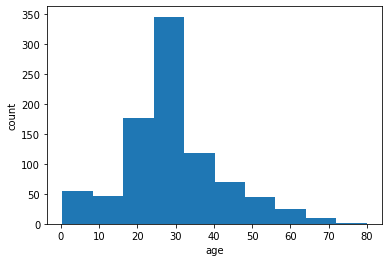

In [14]:
import pyspark
from pyspark_dist_explore import hist

fig, ax = plt.subplots()
ax.set_xlabel('age')
ax.set_ylabel('count')
hist(ax, df_train.select('Age'))

In [16]:
"""ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
pandas로 해보자"""

'ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color=\'teal\', alpha=0.6)\ndf_train["Age"].plot(kind=\'density\', color=\'teal\')\nax.set(xlabel=\'Age\')\nplt.xlim(-10,85)\nplt.show()\npandas로 해보자'

(d) Many columns are categorical variables. So we use one-hot encoding using spark ML
pipeline API. In this example, we are using StringIndexer and OneHotEncoder to do
that

In [68]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorIndexer, VectorAssembler, OneHotEncoderEstimator
from pyspark.ml import Pipeline

ImportError: cannot import name 'OneHotEncoderEstimator' from 'pyspark.ml.feature' (/home/poco/.local/lib/python3.8/site-packages/pyspark/ml/feature.py)

In [32]:
df_sur = df_train.select('Survived').collect()
#df_tmp = df_train.drop('Survived')
"""col_list = df_train.columns
col_list"""
col_list = df_train.columns
col_list
df_train

DataFrame[PassengerId: string, Survived: float, Pclass: string, Name: string, Sex: string, Age: float, SibSp: string, Parch: string, Fare: string, Embarked: string]

In [56]:
numeric_cols = ['PassengerId','Survived', 'Pclass',
                'Age', 'SibSp','Parch', 'Fare'] 
numeric_features = ['PassengerId','Pclass','Age', 'SibSp','Parch','Fare'] 
string_features = ['Name', 'Sex'] 

In [57]:
_stages = []
string_indexer =  [StringIndexer(inputCol = column , \
                                 outputCol = column + '_StringIndexer', 
                                 handleInvalid = "skip") for column in string_features]

one_hot_encoder = [OneHotEncoder(
    inputCols = [column + '_StringIndexer' for column in string_features ], \
    outputCols =  [column + '_OneHotEncoderEstimator' for column in string_features ])]

vect_indexer = [VectorIndexer(
    inputCol = column + '_OneHotEncoderEstimator',
    outputCol = column + '_VectorIndexer', 
    maxCategories=10) for column in string_features]


assemblerInput =  [f  for f in numeric_features]  
assemblerInput += [f + "_VectorIndexer" for f in string_features]
vector_assembler = VectorAssembler(inputCols = assemblerInput, \
                                   outputCol = 'VectorAssembler_features')

_stages += string_indexer
_stages += one_hot_encoder
_stages += vect_indexer
_stages += [vector_assembler]

In [78]:
_stages = []
#indexers =[StringIndexer(inputCol=column, outputCol=column+'_index') for column in col_list]
indexers = [StringIndexer(inputCols = [col for col in col_list], outputCols = [col+'_index' for col in col_list])]

encoders = [OneHotEncoder(inputCols = [col+'_index' for col in col_list], outputCols = [col+'_vec' for col in col_list])]
#pipeline = Pipeline(stages=indexers)
#df_pip = pipeline.fit(df_tmp).transform(df_tmp)

_stages += indexers
_stages += encoders
_stages

[StringIndexer_675db04378cc, OneHotEncoder_8ac640e0b295]

In [79]:
asm_input = [col + '_index' for col in col_list]
vector_assembler = VectorAssembler(inputCols=asm_input, outputCol='features')
_stages += [vector_assembler]
_stages

[StringIndexer_675db04378cc,
 OneHotEncoder_8ac640e0b295,
 VectorAssembler_900b2c869664]

In [58]:
pipeline = Pipeline(stages = _stages)

(e) One we prepared our data, we split the data into two sets: training (80 %) and testing
(20 %) datasets. We use Spark’s randomSplit method to get them. Please leave the
code.


In [59]:
df_tmp = df_train
#train, test = df_train.randomSplit([0.8, 0.2])
#df_tmp = df_tmp.drop('Survived')
df_tmp
df_train = df_train.withColumn('Survived', df_train['Survived'].cast("float").alias('Survived'))
train, test = df_train.randomSplit([0.8, 0.2])

In [60]:
print(train.count())
print(test.count())
print(test)
print(train)

701
190
DataFrame[PassengerId: float, Survived: float, Pclass: float, Name: string, Sex: string, Age: float, SibSp: float, Parch: float, Fare: float, Embarked: string]
DataFrame[PassengerId: float, Survived: float, Pclass: float, Name: string, Sex: string, Age: float, SibSp: float, Parch: float, Fare: float, Embarked: string]


2 Classification using Logistic Regression (20 pts)

In this questions below, you will train and test a logistic regression model. Please leave
your codes for each part in your report.


(a) Create stages for all features, which are processed above, and make a pipeline with
logistic regression using default parameters.


In [61]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

In [62]:
lr = LogisticRegression(labelCol='Survived')
_stages += [lr]
_stages

[StringIndexer_608aafb8208c,
 StringIndexer_e77a41194238,
 OneHotEncoder_16ead623949c,
 VectorIndexer_2334a14fb556,
 VectorIndexer_2441566499ca,
 VectorAssembler_e3d4c7a9a155,
 LogisticRegression_27aea7426635]

In [63]:
pipeline = Pipeline(stages = _stages)

(b) Fit the model.

In [64]:
model = pipeline.fit(train)
train_predict = model.transform(train).select('*')
train_predict

IllegalArgumentException: features does not exist. Available: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked, Name_StringIndexer, Sex_StringIndexer, Name_OneHotEncoderEstimator, Sex_OneHotEncoderEstimator, Name_VectorIndexer, Sex_VectorIndexer, VectorAssembler_features

(c) Once model is trained, we need to know how it’s performing. So we use precision
score as our evaluation metric. Report the result. You can refer to RDD-Evaluation
or Precision with Micro option (Scikit-learn).

In [87]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
test_predict = model.transform(test)

In [98]:
prediction = test_predict.select('PassengerId', 'probability', 'prediction')
#prediction.withColumn('Survived', prediction['prediction'].cast('integer')).drop('prediction')
#prediction = prediction.withColumn('prediction', prediction['prediction'].cast("integer").alias('prediction'))


In [99]:
for row in prediction.collect():
    rid, prob, prec = row

Py4JJavaError: An error occurred while calling o3746.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 337.0 failed 1 times, most recent failure: Lost task 0.0 in stage 337.0 (TID 541) (172.18.242.120 executor driver): org.apache.spark.SparkException: Failed to execute user defined function(StringIndexerModel$$Lambda$3218/1156877334: (string) => double)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Unseen label: 104. To handle unseen labels, set Param handleInvalid to keep.
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1(StringIndexer.scala:406)
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1$adapted(StringIndexer.scala:391)
	... 17 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2253)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2202)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2201)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2201)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1078)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2440)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2382)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2371)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2202)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2223)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2242)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2267)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:390)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3519)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:772)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3516)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(StringIndexerModel$$Lambda$3218/1156877334: (string) => double)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:345)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:898)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:898)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: org.apache.spark.SparkException: Unseen label: 104. To handle unseen labels, set Param handleInvalid to keep.
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1(StringIndexer.scala:406)
	at org.apache.spark.ml.feature.StringIndexerModel.$anonfun$getIndexer$1$adapted(StringIndexer.scala:391)
	... 17 more


In [68]:
evaluator = MulticlassClassificationEvaluator(labelCol='prediction', metricName='accuracy')
evaluator.evaluate(train_predict)

1.0